<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/rbf_test_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]

y_2d = y[y > 0]
y_2d -= 1

In [6]:
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)

In [9]:
sv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = svm.LinearSVC(random_state=42)
grid_search = GridSearchCV(estimator=svc,
             param_grid=param_grid, cv=sv)
grid_search.fit(X_2d, y_2d) 
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

{'C': 0.1}

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


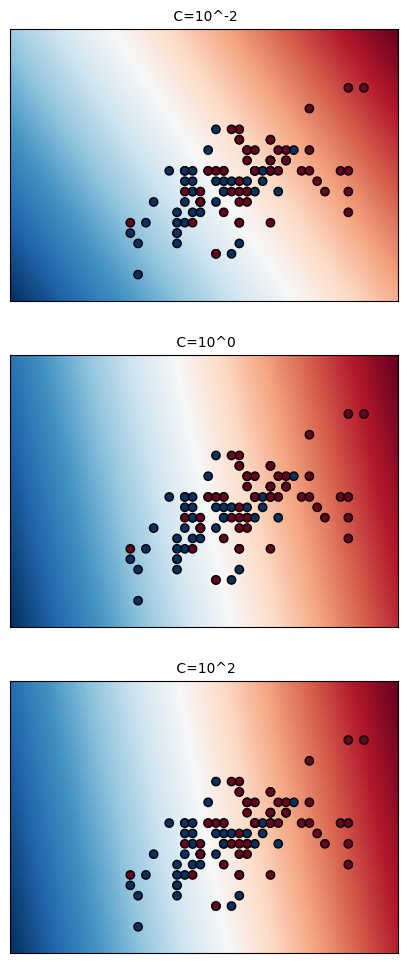

In [13]:
C_2d_range = [1e-2, 1, 1e2]
classifiers = []
for C in C_2d_range:
    clf = svm.LinearSVC(C=C)
    clf.fit(X_2d, y_2d)
    classifiers.append((C, clf))
    
    
plt.figure(figsize=(5, 12))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), 1, k + 1)
    plt.title(" C=10^%d" % (np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

In [14]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

param_grid = dict(C=C_range, gamma=gamma_range)

sv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = svm.SVC(random_state=42)
grid_search = GridSearchCV(estimator=svc,
             param_grid=param_grid, cv=sv)
grid_search.fit(X_2d, y_2d) 
grid_search.best_params_

{'C': 0.01, 'gamma': 1.0}

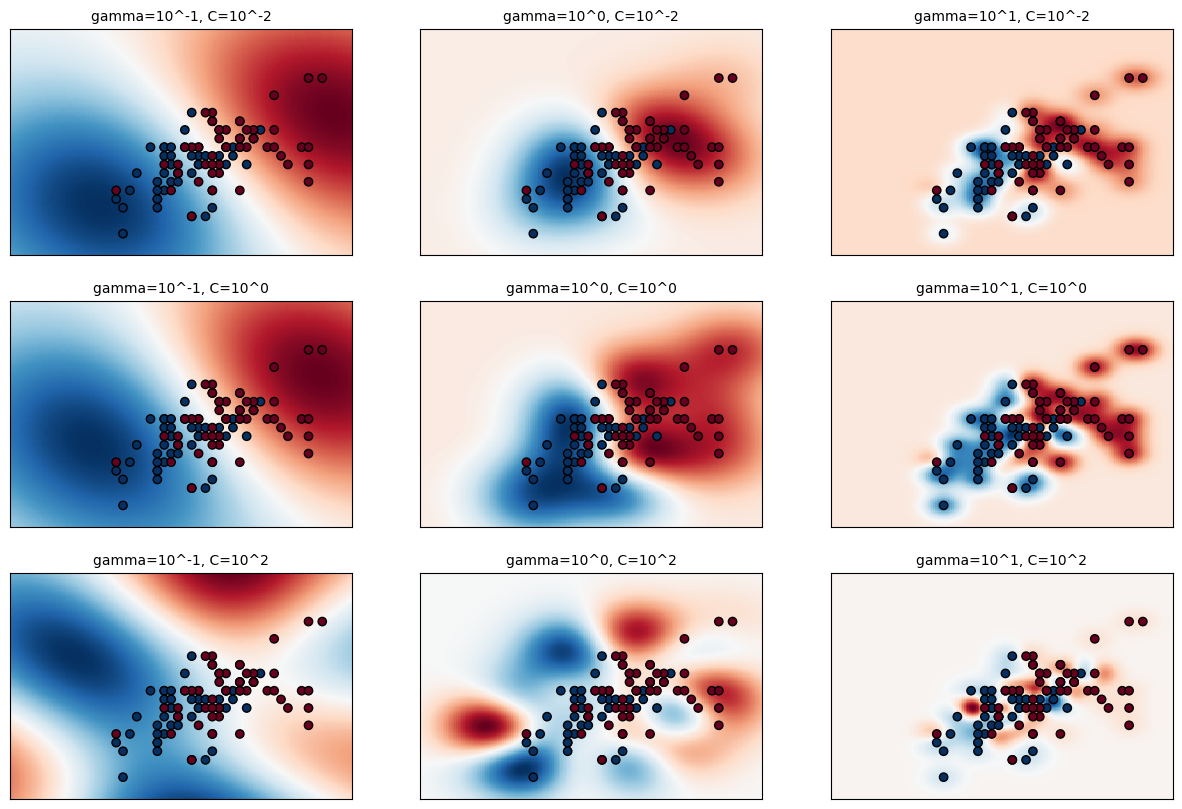

In [15]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = svm.SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# Визуализация
# рисуем визуализацию эффектов параметров

plt.figure(figsize=(15, 10))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")